### 1. Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### 2. Load the Titanic dataset from an online source

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check for missing values and basic structure

In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

### 4. Fill missing values

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\betaf\AppData\Local\Temp\ipykernel_23004\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\betaf\AppData\Local\Temp\ipykernel_23004\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### 5. Drop irrelevant columns (Name, Ticket, Cabin)

In [10]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### 6. Convert categorical variables to numeric using one-hot encoding

In [12]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

### 7. Visualize survival count by gender

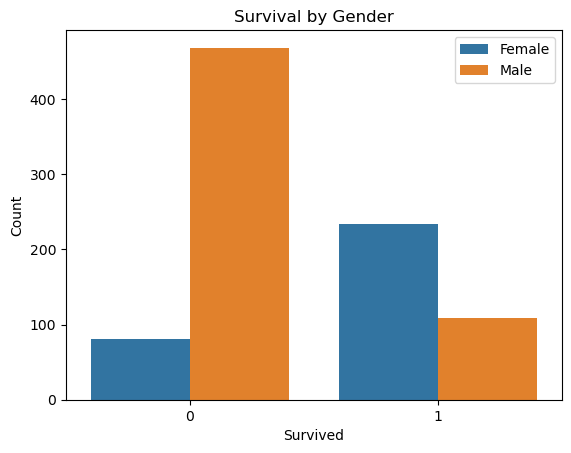

In [14]:
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

### 8. Split dataset into features (X) and target variable (y

In [16]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 9. Train and evaluate Decision Tree Classifier

In [18]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7206703910614525


### 10. Train and evaluate Random Forest Classifier

In [20]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8379888268156425


### 11. Train and evaluate K-Nearest Neighbors Classifier

In [22]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.659217877094972


### 12. Visualize the trained Decision Tree

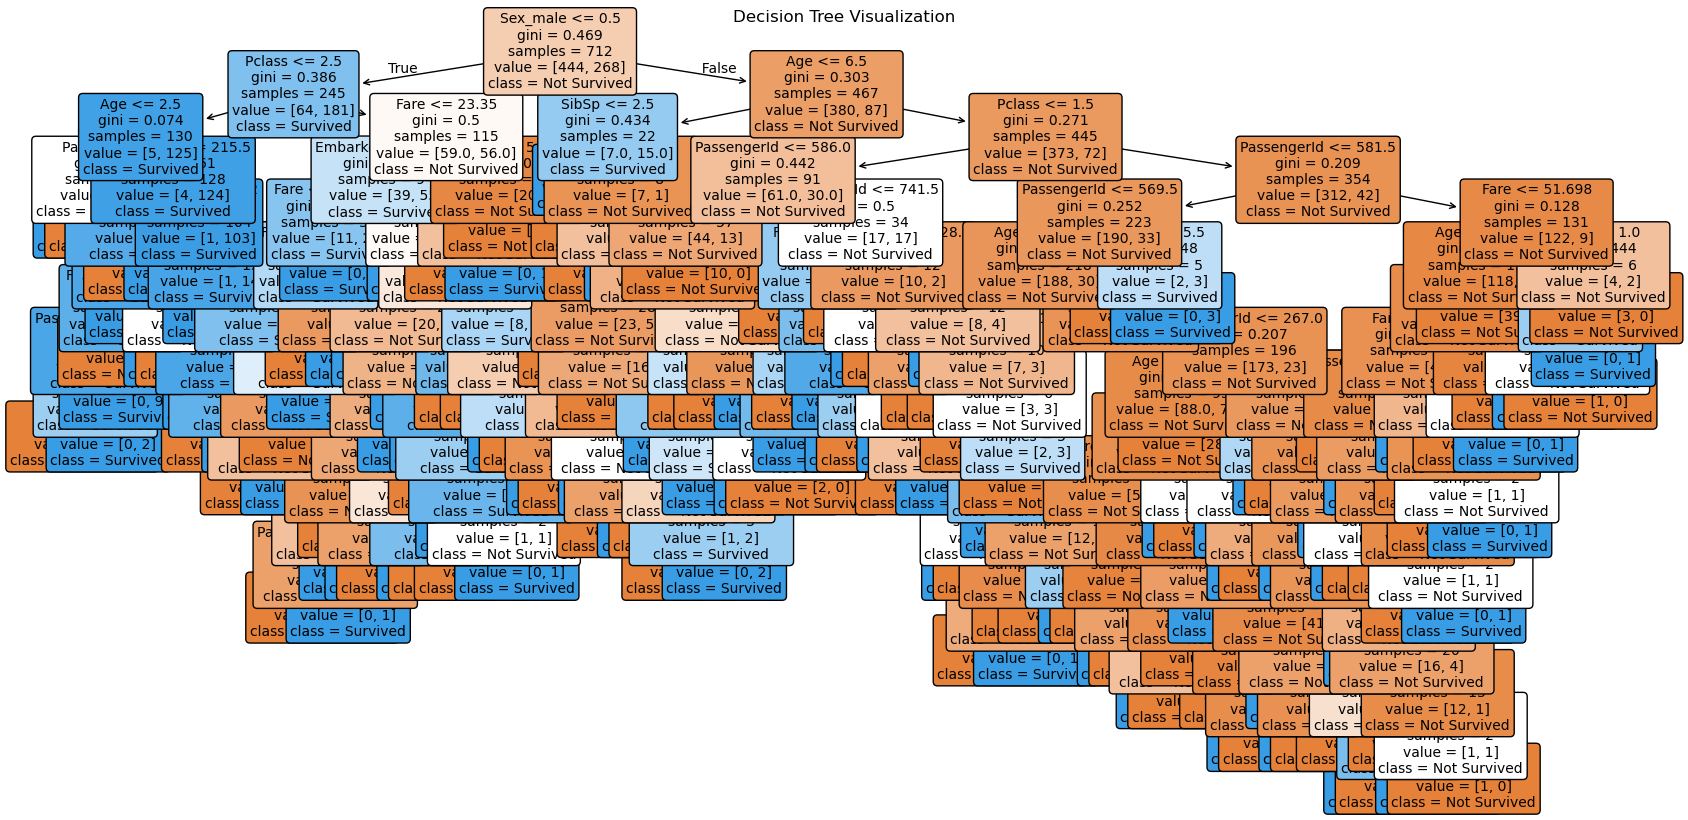

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

### 13. Feature importances from the Decision Tree

In [26]:
importances = model_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,Sex_male,0.293493
0,PassengerId,0.225886
5,Fare,0.190169
2,Age,0.119369
1,Pclass,0.107295
3,SibSp,0.033295
4,Parch,0.019109
8,Embarked_S,0.008819
7,Embarked_Q,0.002564


### 14. Visualize feature importances as a bar chart

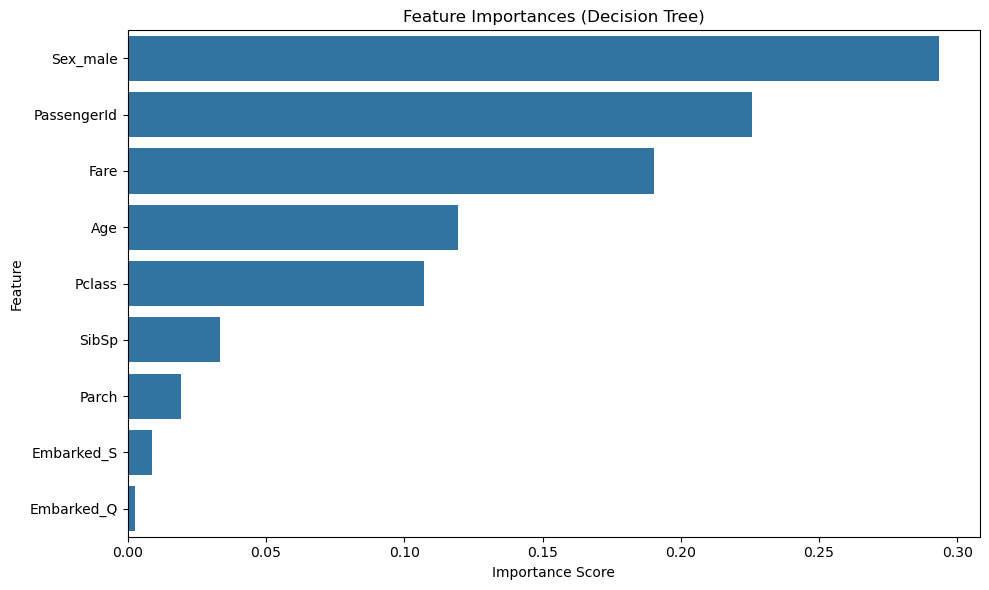

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [44]:
# Compare the accuracy scores of all three models
print("🔍 Model Accuracy Comparison:")
print(f"➡️ Decision Tree Accuracy  : {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"➡️ Random Forest Accuracy  : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"➡️ K-Nearest Neighbors     : {accuracy_score(y_test, y_pred_knn):.4f}")

🔍 Model Accuracy Comparison:
➡️ Decision Tree Accuracy  : 0.7207
➡️ Random Forest Accuracy  : 0.8380
➡️ K-Nearest Neighbors     : 0.6592
